Assignment 2

Part B

In [78]:
import numpy as np


gridsize = 5
orientation = 4  
actions = 4  
blacksq = [(3, 2), (2, 5), (4, 5)]
walls = [(1, 2), (1, 3), (5, 2), (5, 3)]
terminals = {(5, 5): 100, (3, 4): -1000}
costs1 = [-1, -1.5, -0.5, -0.5]
maxiter = 100

values = np.zeros((gridsize, gridsize, orientation))



for d in range(orientation):
    values[4,4,d] = 100
    values[2,3,d] = -1000

def validmove(x, y, d, steps):
    if steps == 1:
        if d == 1 and (x, y+1) not in walls and (x, y+1) not in blacksq:  
            return True
        if d == 2 and (x, y-1) not in walls and (x, y-1) not in blacksq:  
            return True
        if d == 3 and (x-1, y) not in walls and (x-1, y) not in blacksq:  
            return True
        if d == 4 and (x+1, y) not in walls and (x+1, y) not in blacksq:  
            return True
    elif steps == 2:
         intermediate_cell = None
         if d == 1:
             intermediate_cell = (x, y+1)
             if intermediate_cell in blacksq or intermediate_cell in terminals and terminals[intermediate_cell] == -1000:
                 return False
         if d == 2:
             intermediate_cell = (x, y-1)
             if intermediate_cell in blacksq or intermediate_cell in terminals and terminals[intermediate_cell] == -1000:
                 return False
         if d == 3:
             intermediate_cell = (x-1, y)
             if intermediate_cell in blacksq or intermediate_cell in terminals and terminals[intermediate_cell] == -1000:
                 return False
         if d == 4:
             intermediate_cell = (x+1, y)
             if intermediate_cell in blacksq or intermediate_cell in terminals and terminals[intermediate_cell] == -1000:
                 return False
         if d == 1 and (x, y+1) not in walls and (x, y+2) not in walls and (x, y+1) not in blacksq and (x, y+2) not in blacksq:  
             return True
         if d == 2 and (x, y-1) not in walls and (x, y-2) not in walls and (x, y-1) not in blacksq and (x, y-2) not in blacksq:  
             return True
         if d == 3 and (x-1, y) not in walls and (x-2, y) not in walls and (x-1, y) not in blacksq and (x-2, y) not in blacksq:  
             return True
         if d == 4 and (x+1, y) not in walls and (x+2, y) not in walls and (x+1, y) not in blacksq and (x+2, y) not in blacksq:  
             return True
    return False



def transition(state, action):
    x, y, d = state
    if action == 0:  
        if not validmove(x, y, d, 1): 
            return state
        if d == 1: y += 1
        elif d == 2: y -= 1
        elif d == 3: x -= 1
        elif d == 4: x += 1
    elif action == 1:  
        if not validmove(x, y, d, 2):
            return state
        if d == 1: y += 2
        elif d == 2: y -= 2
        elif d == 3: x -= 2
        elif d == 4: x += 2
    elif action == 2:  
        d = {1: 3, 2: 4, 3: 2, 4: 1}[d]  
        return (x, y, d)
    elif action == 3:  
        d = {1: 4, 2: 3, 3: 1, 4: 2}[d]  
        return (x, y, d)

    if (1 <= x <= gridsize) and (1 <= y <= gridsize) and (x, y) not in blacksq:
        return (x, y, d)
    return state



for iteration in range(1, maxiter+1):

    newvals = np.copy(values)
    print("iter", iteration, ":")
    for x in range(1, gridsize+1):
        for y in range(1, gridsize+1):
            for d in range(1, orientation+1):
                if (x, y) in terminals or (x, y) in blacksq:
                    continue
                bestval = float('-inf')
                bestaction = None
                for a in range(actions):
                    next_state = transition((x, y, d), a)
                    # value = costs1[a] + values[next_state[0]-1, next_state[1]-1, next_state[2]-1]
                    if next_state in terminals:
                        value = costs1[a] + terminals[next_state]
                    else:
                        value = costs1[a] + values[next_state[0]-1, next_state[1]-1, next_state[2]-1]
                    if value > bestval:
                        bestval = value
                        bestaction = a
                newvals[x-1, y-1, d-1] = bestval
                print(f'state ({x},{y},{d}) V = {bestval:.2f} Best Action: A{bestaction+1}')
    values = newvals
    if iteration == 100:
        newvals2 = values
    print()


iter 1 :
state (1,1,1) V = -0.50 Best Action: A3
state (1,1,2) V = -0.50 Best Action: A3
state (1,1,3) V = -0.50 Best Action: A3
state (1,1,4) V = -0.50 Best Action: A3
state (1,2,1) V = -0.50 Best Action: A3
state (1,2,2) V = -0.50 Best Action: A3
state (1,2,3) V = -0.50 Best Action: A3
state (1,2,4) V = -0.50 Best Action: A3
state (1,3,1) V = -0.50 Best Action: A3
state (1,3,2) V = -0.50 Best Action: A3
state (1,3,3) V = -0.50 Best Action: A3
state (1,3,4) V = -0.50 Best Action: A3
state (1,4,1) V = -0.50 Best Action: A3
state (1,4,2) V = -0.50 Best Action: A3
state (1,4,3) V = -0.50 Best Action: A3
state (1,4,4) V = -0.50 Best Action: A3
state (1,5,1) V = -0.50 Best Action: A3
state (1,5,2) V = -0.50 Best Action: A3
state (1,5,3) V = -0.50 Best Action: A3
state (1,5,4) V = -0.50 Best Action: A3
state (2,1,1) V = -0.50 Best Action: A3
state (2,1,2) V = -0.50 Best Action: A3
state (2,1,3) V = -0.50 Best Action: A3
state (2,1,4) V = -0.50 Best Action: A3
state (2,2,1) V = -0.50 Best Ac

Following the path of the best actions at 100th iteration:

1. state (1,1,1) V = 91.00 Best Action: A4 (turns right)

2. state (1,1,4) V = 91.50 Best Action: A1 (goes forward by one cell)

3. state (2,1,4) V = 92.50 Best Action: A2 (goes forward by two cells)

4. state (4,1,4) V = 94.00 Best Action: A3 (turns left)

5. state (4,1,1) V = 94.50 Best Action: A1 (goes forward by one cell)

6. state (4,2,1) V = 95.50 Best Action: A2 (goes forward by two cells)

7. state (4,4,1) V = 97.00 Best Action: A4 (turns right)

8. state (4,4,4) V = 97.50 Best Action: A1 (goes forward by one cell)

9. state (5,4,4) V = 98.50 Best Action: A3 (turns left)

10. state (5,4,1) V = 99.00 Best Action: A1 (goes forward by one cell)

it follows the same path as the common sense path

REACHES THE TERMINAL STATE



Part D with gamma=0.9

In [79]:
import numpy as np


gridsize = 5
orientation = 4  
actions = 4  
blacksq = [(3, 2), (2, 5), (4, 5)]
walls = [(1, 2), (1, 3), (5, 2), (5, 3)]
terminals = {(5, 5): 100, (3, 4): -1000}
costs1 = [-1, -1.5, -0.5, -0.5]
maxiter = 100

values = np.zeros((gridsize, gridsize, orientation))



for d in range(orientation):
    values[4,4,d] = 100
    values[2,3,d] = -1000

def validmove(x, y, d, steps):
    if steps == 1:
        if d == 1 and (x, y+1) not in walls and (x, y+1) not in blacksq:  
            return True
        if d == 2 and (x, y-1) not in walls and (x, y-1) not in blacksq:  
            return True
        if d == 3 and (x-1, y) not in walls and (x-1, y) not in blacksq:  
            return True
        if d == 4 and (x+1, y) not in walls and (x+1, y) not in blacksq:  
            return True
    elif steps == 2:
         intermediate_cell = None
         if d == 1:
             intermediate_cell = (x, y+1)
             if intermediate_cell in blacksq or intermediate_cell in terminals and terminals[intermediate_cell] == -1000:
                 return False
         if d == 2:
             intermediate_cell = (x, y-1)
             if intermediate_cell in blacksq or intermediate_cell in terminals and terminals[intermediate_cell] == -1000:
                 return False
         if d == 3:
             intermediate_cell = (x-1, y)
             if intermediate_cell in blacksq or intermediate_cell in terminals and terminals[intermediate_cell] == -1000:
                 return False
         if d == 4:
             intermediate_cell = (x+1, y)
             if intermediate_cell in blacksq or intermediate_cell in terminals and terminals[intermediate_cell] == -1000:
                 return False
         if d == 1 and (x, y+1) not in walls and (x, y+2) not in walls and (x, y+1) not in blacksq and (x, y+2) not in blacksq:  
             return True
         if d == 2 and (x, y-1) not in walls and (x, y-2) not in walls and (x, y-1) not in blacksq and (x, y-2) not in blacksq:  
             return True
         if d == 3 and (x-1, y) not in walls and (x-2, y) not in walls and (x-1, y) not in blacksq and (x-2, y) not in blacksq:  
             return True
         if d == 4 and (x+1, y) not in walls and (x+2, y) not in walls and (x+1, y) not in blacksq and (x+2, y) not in blacksq:  
             return True
    return False



def transition(state, action):
    x, y, d = state
    if action == 0:  
        if not validmove(x, y, d, 1): 
            return state
        if d == 1: y += 1
        elif d == 2: y -= 1
        elif d == 3: x -= 1
        elif d == 4: x += 1
    elif action == 1:  
        if not validmove(x, y, d, 2):
            return state
        if d == 1: y += 2
        elif d == 2: y -= 2
        elif d == 3: x -= 2
        elif d == 4: x += 2
    elif action == 2:  
        d = {1: 3, 2: 4, 3: 2, 4: 1}[d]  
        return (x, y, d)
    elif action == 3:  
        d = {1: 4, 2: 3, 3: 1, 4: 2}[d]  
        return (x, y, d)

    if (1 <= x <= gridsize) and (1 <= y <= gridsize) and (x, y) not in blacksq:
        return (x, y, d)
    return state

gamma = 0.9

for iteration in range(1, maxiter+1):
    newvals = np.copy(values)
    print("iter", iteration, ":")
    for x in range(1, gridsize+1):
        for y in range(1, gridsize+1):
            for d in range(1, orientation+1):
                if (x, y) in terminals or (x, y) in blacksq:
                    continue
                bestval = float('-inf')
                bestaction = None
                for a in range(actions):
                    next_state = transition((x, y, d), a)
                    # value = costs1[a] + values[next_state[0]-1, next_state[1]-1, next_state[2]-1]
                    if next_state in terminals:
                        value = costs1[a] + terminals[next_state]
                    else:
                        value = costs1[a] + gamma*values[next_state[0]-1, next_state[1]-1, next_state[2]-1]
                    if value > bestval:
                        bestval = value
                        bestaction = a
                newvals[x-1, y-1, d-1] = bestval
                print(f'state ({x},{y},{d}) V = {bestval:.2f} Best Action: A{bestaction+1}')
    values = newvals
    if iteration == 100:
        newvals3 = values
    print()


iter 1 :
state (1,1,1) V = -0.50 Best Action: A3
state (1,1,2) V = -0.50 Best Action: A3
state (1,1,3) V = -0.50 Best Action: A3
state (1,1,4) V = -0.50 Best Action: A3
state (1,2,1) V = -0.50 Best Action: A3
state (1,2,2) V = -0.50 Best Action: A3
state (1,2,3) V = -0.50 Best Action: A3
state (1,2,4) V = -0.50 Best Action: A3
state (1,3,1) V = -0.50 Best Action: A3
state (1,3,2) V = -0.50 Best Action: A3
state (1,3,3) V = -0.50 Best Action: A3
state (1,3,4) V = -0.50 Best Action: A3
state (1,4,1) V = -0.50 Best Action: A3
state (1,4,2) V = -0.50 Best Action: A3
state (1,4,3) V = -0.50 Best Action: A3
state (1,4,4) V = -0.50 Best Action: A3
state (1,5,1) V = -0.50 Best Action: A3
state (1,5,2) V = -0.50 Best Action: A3
state (1,5,3) V = -0.50 Best Action: A3
state (1,5,4) V = -0.50 Best Action: A3
state (2,1,1) V = -0.50 Best Action: A3
state (2,1,2) V = -0.50 Best Action: A3
state (2,1,3) V = -0.50 Best Action: A3
state (2,1,4) V = -0.50 Best Action: A3
state (2,2,1) V = -0.50 Best Ac

Following the path of the best actions at 100th iteration (gamma = 0.9):

1. state (1,1,1) V = 29.00 Best Action: A4 (turns right)

2. state (1,1,4) V = 32.78 Best Action: A1 (goes forward by one cell)

3. state (2,1,4) V = 37.53 Best Action: A2 (goes forward by two cells)

4. state (4,1,4) V = 43.37 Best Action: A3 (turns left)

5. state (4,1,1) V = 48.74 Best Action: A1 (goes forward by one cell)

6. state (4,2,1) V = 55.27 Best Action: A2 (goes forward by two cells)

7. state (4,4,1) V = 63.08 Best Action: A4 (turns right)

8. state (4,4,4) V = 70.64 Best Action: A1 (goes forward by one cell)

9. state (5,4,4) V = 79.60 Best Action: A3 (turns left)

10. state (5,4,1) V = 89.00 Best Action: A1 (goes forward by one cell)

it follows the same path as the common sense path

REACHES THE TERMINAL STATE


Code to roughly visualize the V values at the 100th iteration (no gamma) *NOTE: THE CELL (1,1) IS ON THE TOP LEFT CORNER AND THE CELL (5,5) IS ON THE BOTTOM RIGHT CORNER AND THE BLACK SQAURES ARE REPRESENTED BY 0. THIS IS JUST A ROUGH MAP I MADE FOR REFERENCE AND HENCE I DID NOT BOTHER TO DETAIL IT*

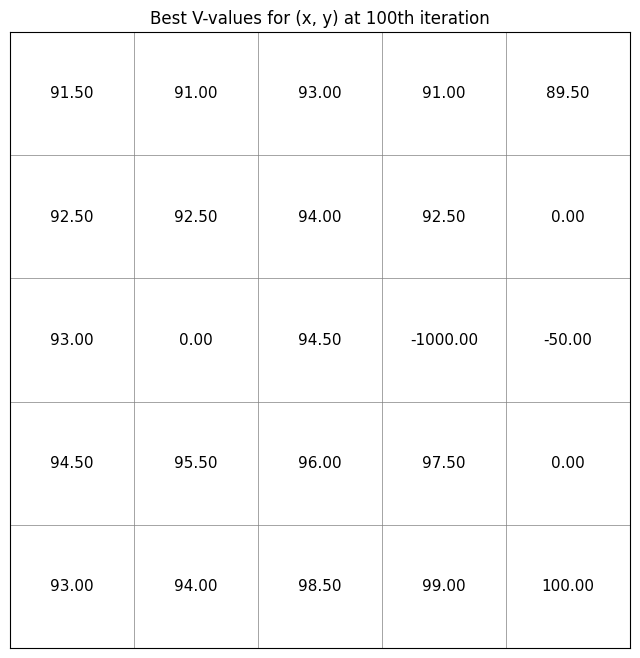

In [80]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(8,8))
for i in range(gridsize):
    for j in range(gridsize):
        max_value = np.max(newvals2[i, j])  
        axis.text(j, i, f'{max_value:.2f}', ha="center", va="center", color="black", fontsize=11)

for i in range(gridsize+1):
    axis.axhline(i-0.5, color="gray", lw=0.5)
    axis.axvline(i-0.5, color="gray", lw=0.5)

axis.set_xlim(-0.5, gridsize-0.5)
axis.set_ylim(gridsize-0.5, -0.5)
axis.set_xticks([])
axis.set_yticks([])
axis.set_title("Best V-values for (x, y) at 100th iteration")
plt.show()



Code to roughly visualize the V values at the 100th iteration (gamma=0.9) *NOTE: THE CELL (1,1) IS ON THE TOP LEFT CORNER AND THE CELL (5,5) IS ON THE BOTTOM RIGHT CORNER AND THE BLACK SQAURES ARE REPRESENTED BY 0. THIS IS JUST A ROUGH MAP I MADE FOR REFERENCE AND HENCE I DID NOT BOTHER TO DETAIL IT*

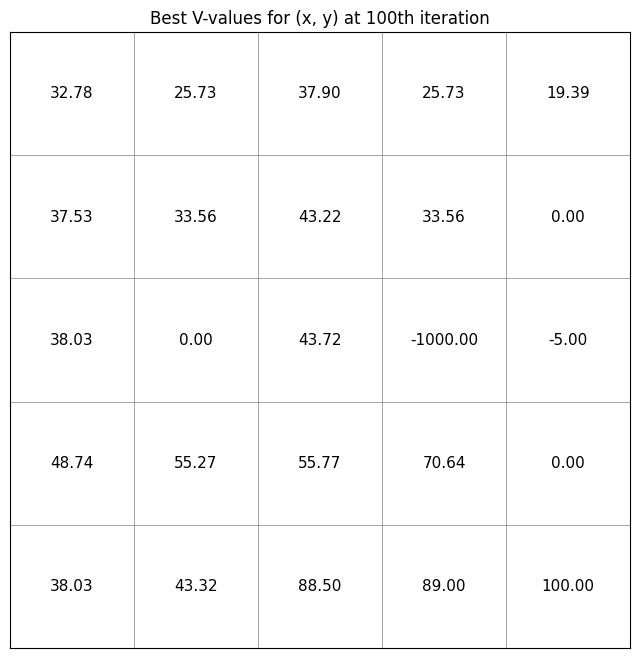

In [81]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(8,8))
for i in range(gridsize):
    for j in range(gridsize):
        max_value = np.max(newvals3[i, j])  
        axis.text(j, i, f'{max_value:.2f}', ha="center", va="center", color="black", fontsize=11)

for i in range(gridsize+1):
    axis.axhline(i-0.5, color="gray", lw=0.5)
    axis.axvline(i-0.5, color="gray", lw=0.5)

axis.set_xlim(-0.5, gridsize-0.5)
axis.set_ylim(gridsize-0.5, -0.5)
axis.set_xticks([])
axis.set_yticks([])
axis.set_title("Best V-values for (x, y) at 100th iteration")
plt.show()


Part E (gamma=0.1)

In [82]:
import numpy as np


gridsize = 5
orientation = 4  
actions = 4  
blacksq = [(3, 2), (2, 5), (4, 5)]
walls = [(1, 2), (1, 3), (5, 2), (5, 3)]
terminals = {(5, 5): 100, (3, 4): -1000}
costs1 = [-1, -1.5, -0.5, -0.5]
maxiter = 100

values = np.zeros((gridsize, gridsize, orientation))



for d in range(orientation):
    values[4,4,d] = 100
    values[2,3,d] = -1000

for d in range(orientation):
    values[4,4,d] = 100
    values[2,3,d] = -1000

def validmove(x, y, d, steps):
    if steps == 1:
        if d == 1 and (x, y+1) not in walls and (x, y+1) not in blacksq:  
            return True
        if d == 2 and (x, y-1) not in walls and (x, y-1) not in blacksq:  
            return True
        if d == 3 and (x-1, y) not in walls and (x-1, y) not in blacksq:  
            return True
        if d == 4 and (x+1, y) not in walls and (x+1, y) not in blacksq:  
            return True
    elif steps == 2:
         intermediate_cell = None
         if d == 1:
             intermediate_cell = (x, y+1)
             if intermediate_cell in blacksq or intermediate_cell in terminals and terminals[intermediate_cell] == -1000:
                 return False
         if d == 2:
             intermediate_cell = (x, y-1)
             if intermediate_cell in blacksq or intermediate_cell in terminals and terminals[intermediate_cell] == -1000:
                 return False
         if d == 3:
             intermediate_cell = (x-1, y)
             if intermediate_cell in blacksq or intermediate_cell in terminals and terminals[intermediate_cell] == -1000:
                 return False
         if d == 4:
             intermediate_cell = (x+1, y)
             if intermediate_cell in blacksq or intermediate_cell in terminals and terminals[intermediate_cell] == -1000:
                 return False
         if d == 1 and (x, y+1) not in walls and (x, y+2) not in walls and (x, y+1) not in blacksq and (x, y+2) not in blacksq:  
             return True
         if d == 2 and (x, y-1) not in walls and (x, y-2) not in walls and (x, y-1) not in blacksq and (x, y-2) not in blacksq:  
             return True
         if d == 3 and (x-1, y) not in walls and (x-2, y) not in walls and (x-1, y) not in blacksq and (x-2, y) not in blacksq:  
             return True
         if d == 4 and (x+1, y) not in walls and (x+2, y) not in walls and (x+1, y) not in blacksq and (x+2, y) not in blacksq:  
             return True
    return False



def transition(state, action):
    x, y, d = state
    if action == 0:  
        if not validmove(x, y, d, 1): 
            return state
        if d == 1: y += 1
        elif d == 2: y -= 1
        elif d == 3: x -= 1
        elif d == 4: x += 1
    elif action == 1:  
        if not validmove(x, y, d, 2):
            return state
        if d == 1: y += 2
        elif d == 2: y -= 2
        elif d == 3: x -= 2
        elif d == 4: x += 2
    elif action == 2:  
        d = {1: 3, 2: 4, 3: 2, 4: 1}[d]  
        return (x, y, d)
    elif action == 3:  
        d = {1: 4, 2: 3, 3: 1, 4: 2}[d]  
        return (x, y, d)

    if (1 <= x <= gridsize) and (1 <= y <= gridsize) and (x, y) not in blacksq:
        return (x, y, d)
    return state

gamma = 0.1

for iteration in range(1, maxiter+1):
    newvals = np.copy(values)
    print("iter", iteration, ":")
    for x in range(1, gridsize+1):
        for y in range(1, gridsize+1):
            for d in range(1, orientation+1):
                if (x, y) in terminals or (x, y) in blacksq:
                    continue
                bestval = float('-inf')
                bestaction = None
                for a in range(actions):
                    next_state = transition((x, y, d), a)
                    # value = costs1[a] + values[next_state[0]-1, next_state[1]-1, next_state[2]-1]
                    if next_state in terminals:
                        value = costs1[a] + terminals[next_state]
                    else:
                        value = costs1[a] + gamma*values[next_state[0]-1, next_state[1]-1, next_state[2]-1]
                    if value > bestval:
                        bestval = value
                        bestaction = a
                newvals[x-1, y-1, d-1] = bestval
                print(f'state ({x},{y},{d}) V = {bestval:.2f} Best Action: A{bestaction+1}')
    values = newvals
    if iteration == 100:
        newvals4 = values
    print()


iter 1 :
state (1,1,1) V = -0.50 Best Action: A3
state (1,1,2) V = -0.50 Best Action: A3
state (1,1,3) V = -0.50 Best Action: A3
state (1,1,4) V = -0.50 Best Action: A3
state (1,2,1) V = -0.50 Best Action: A3
state (1,2,2) V = -0.50 Best Action: A3
state (1,2,3) V = -0.50 Best Action: A3
state (1,2,4) V = -0.50 Best Action: A3
state (1,3,1) V = -0.50 Best Action: A3
state (1,3,2) V = -0.50 Best Action: A3
state (1,3,3) V = -0.50 Best Action: A3
state (1,3,4) V = -0.50 Best Action: A3
state (1,4,1) V = -0.50 Best Action: A3
state (1,4,2) V = -0.50 Best Action: A3
state (1,4,3) V = -0.50 Best Action: A3
state (1,4,4) V = -0.50 Best Action: A3
state (1,5,1) V = -0.50 Best Action: A3
state (1,5,2) V = -0.50 Best Action: A3
state (1,5,3) V = -0.50 Best Action: A3
state (1,5,4) V = -0.50 Best Action: A3
state (2,1,1) V = -0.50 Best Action: A3
state (2,1,2) V = -0.50 Best Action: A3
state (2,1,3) V = -0.50 Best Action: A3
state (2,1,4) V = -0.50 Best Action: A3
state (2,2,1) V = -0.50 Best Ac

Following the path of the best actions at 100th iteration (gamma = 0.1):

1. state (1,1,1) V = -0.56 Best Action: A3 (turns left)

2. state (1,1,3) V = -0.56 Best Action: A3 (turns left)

3. state (1,1,3) V = -0.56 Best Action: A3 (turns left)

4. state (1,1,4) V = -0.56 Best Action: A3 (turns left)

So it's stuck in a loop and doesn't reach anywhere




Code to roughly visualize the V values at the 100th iteration (gamma=0.1) *NOTE: THE CELL (1,1) IS ON THE TOP LEFT CORNER AND THE CELL (5,5) IS ON THE BOTTOM RIGHT CORNER AND THE BLACK SQAURES ARE REPRESENTED BY 0. THIS IS JUST A ROUGH MAP I MADE FOR REFERENCE AND HENCE I DID NOT BOTHER TO DETAIL IT*

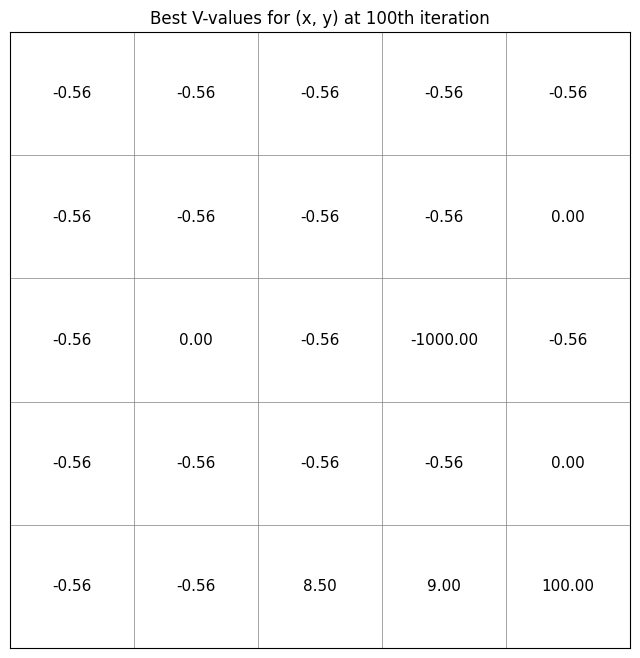

In [83]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(8,8))
for i in range(gridsize):
    for j in range(gridsize):
        max_value = np.max(newvals4[i, j])  
        axis.text(j, i, f'{max_value:.2f}', ha="center", va="center", color="black", fontsize=11)

for i in range(gridsize+1):
    axis.axhline(i-0.5, color="gray", lw=0.5)
    axis.axvline(i-0.5, color="gray", lw=0.5)

axis.set_xlim(-0.5, gridsize-0.5)
axis.set_ylim(gridsize-0.5, -0.5)
axis.set_xticks([])
axis.set_yticks([])
axis.set_title("Best V-values for (x, y) at 100th iteration")
plt.show()
